# Comprobación de la calibración del irradiador MDS Nordion
-----

Importar módulos necesarios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Irradiación con dosis alta (alrededor de 10 Gy)
Leer las dosis medidas según las dos orientaciones

In [2]:
vaddf = pd.read_csv('Dosis/IVertical.dxf', delimiter='\t', header=47, names=np.arange(452))
haddf = pd.read_csv('Dosis/IHorizontal.dxf', delimiter='\t', header=47, names=np.arange(223))

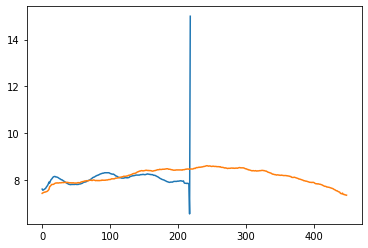

In [3]:
plt.plot(vaddf.values[:,35])
plt.plot(vaddf.values[35, :-3])

La imagen vertical está afectada por la depdendencia de la calibración con la orientación

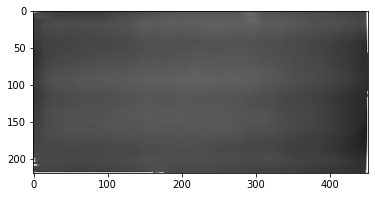

In [4]:
vada = vaddf.values
plt.imshow(vada, cmap=plt.cm.gray)

La imagen horizontal está afectada por el artefacto de respuesta lateral

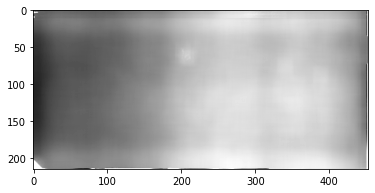

In [5]:
hada = haddf.values[:,2:-6].transpose()
np.flip(hada, axis=1)
plt.imshow(hada, cmap=plt.cm.gray)

Calcular el factor de corrección de la calibración con la orientación

Tomamos como referencia la parte central donde no hay una dependencia importante

In [6]:
fcsoc = (hada[:,:100]/vada[:215,:100])[10:-10,10:-10]
afcoc = fcsoc.mean()
afcoc, fcsoc.std()

(1.1606899532565833, 0.04497482918542799)

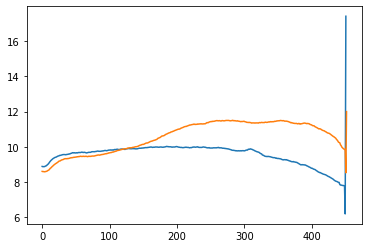

In [7]:
fila = 150
plt.plot(vada[fila,:]*afcoc)
plt.plot(hada[fila,:])

Corregir la distribución de dosis

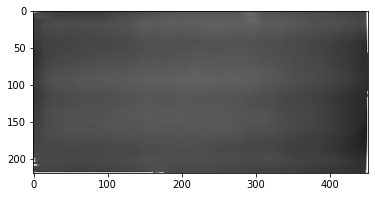

In [8]:
avdosea = afcoc * vaddf.values
plt.imshow(avdosea, cmap=plt.cm.gray)

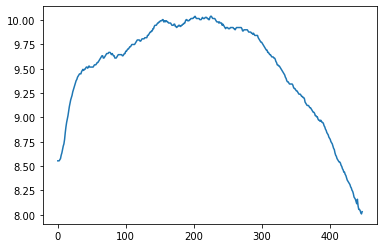

In [9]:
plt.plot(avdosea[110,:-3])

Calcular el valor de la dosis en la parte central

In [10]:
avdosecentro = avdosea[90:110, 190:210]
avdosecentro.mean(), avdosecentro.std()

(10.241870113038425, 0.10754027308438115)

## Irradiación con dosis media (alrededor de 5 Gy)
Leer las dosis medidas según las dos orientaciones

In [11]:
vmddf = pd.read_csv('Dosis/IIVertical.dxf', delimiter='\t', header=47, names=np.arange(454))
hmddf = pd.read_csv('Dosis/IIHorizontal.dxf', delimiter='\t', header=47, names=np.arange(221))

La imagen vertical está afectada por la depdendencia de la calibración con la orientación

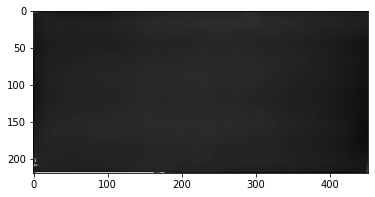

In [12]:
vmda = vmddf.values[:-1,2:]
plt.imshow(vmda, cmap=plt.cm.gray)

La imagen horizontal está afectada por el artefacto de respuesta lateral

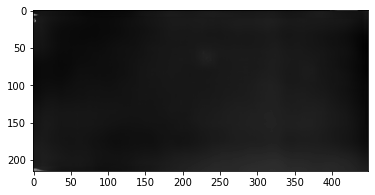

In [13]:
hmda = hmddf.values[6:-5,3:-3].transpose()
np.flip(hmda, axis=1)
plt.imshow(hmda, cmap=plt.cm.gray)

Calcular elfactor de corrección de la calibración con la orientación

Tomamos como referencia la parte central donde no hay una dependencia importante

In [14]:
fcsoc = (hmda[:,:100]/vmda[:215,:100])[10:-10,10:-10]
mfcoc = fcsoc.mean()
mfcoc, fcsoc.std()

(0.8634825726993811, 0.027299284121590963)

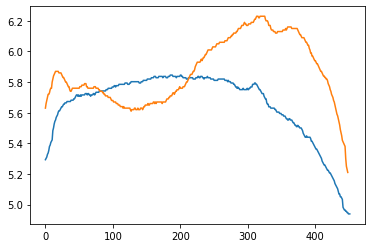

In [15]:
fila = 150
plt.plot(vmda[fila,:]*mfcoc)
plt.plot(hmda[fila,:])

Corregir la distribución de dosis

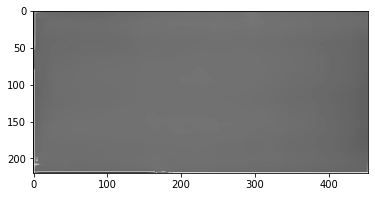

In [16]:
mvdosea = mfcoc * vmddf.values
plt.imshow(mvdosea, cmap=plt.cm.gray)

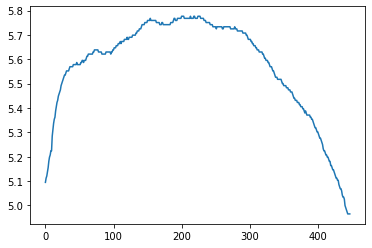

In [17]:
plt.plot(mvdosea[110,3:-3])

Calcular el valor de la dosis en la parte central

In [18]:
mvdosecentro = mvdosea[90:110, 190:210]
mvdosecentro.mean(), mvdosecentro.std()

(5.802646062668476, 0.0194331064595755)

## Irradiación con dosis baja (alrededor de 2.5 Gy)
Leer las dosis medidas según las dos orientaciones

In [19]:
vbddf = pd.read_csv('Dosis/IIIVertical.dxf', delimiter='\t', header=47, names=np.arange(453))
hbddf = pd.read_csv('Dosis/IIIHorizontal.dxf', delimiter='\t', header=47, names=np.arange(222))

La imagen vertical está afectada por la depdendencia de la calibración con la orientación

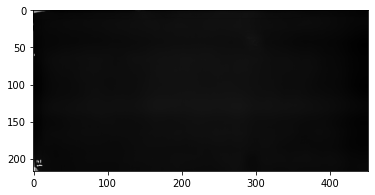

In [20]:
vbda = vbddf.values[3:,1:]
plt.imshow(vbda, cmap=plt.cm.gray)

La imagen horizontal está afectada por el artefacto de respuesta lateral

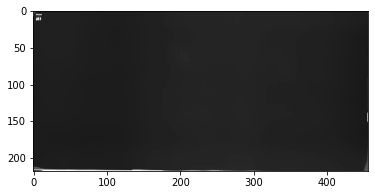

In [21]:
hbda = hbddf.values[4:-1,2:-2].transpose()
np.flip(hbda, axis=1)
plt.imshow(hbda, cmap=plt.cm.gray)

Calcular elfactor de corrección de la calibración con la orientación

Tomamos como referencia la parte central donde no hay una dependencia importante

In [22]:
fcsoc = (hbda[:217,:100]/vbda[:,:100])[10:-10,10:-10]
bfcoc = fcsoc.mean()
bfcoc, fcsoc.std()

(0.7552052995200343, 0.0515551294457347)

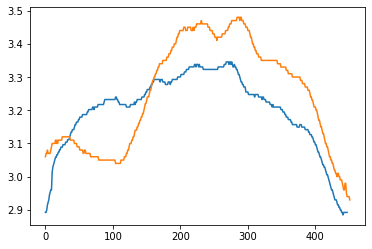

In [23]:
fila = 150
plt.plot(vbda[fila,2:-2]*bfcoc)
plt.plot(hbda[fila,2:-2])

Corregir la distribución de dosis

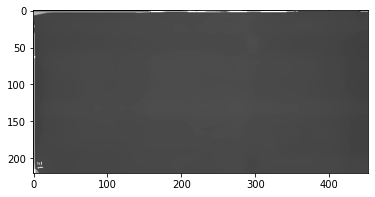

In [24]:
bvdosea = bfcoc * vbddf.values
plt.imshow(bvdosea, cmap=plt.cm.gray)

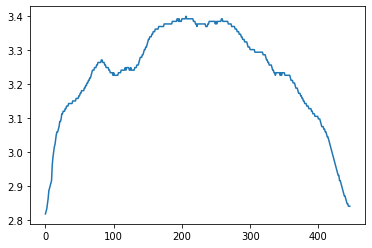

In [25]:
plt.plot(bvdosea[110,3:-3])

Calcular el valor de la dosis en la parte central

In [26]:
bvdosecentro = bvdosea[90:110, 190:210]
bvdosecentro.mean(), bvdosecentro.std()

(3.376504014021585, 0.006286800626640101)

### Resumen de dosis medidas

In [27]:
avdosecentro.mean(), mvdosecentro.mean(), bvdosecentro.mean()

(10.241870113038425, 5.802646062668476, 3.376504014021585)

## Distribuciones de dosis relativa

Representar perfiles de dosis relativa obtenodps a partir de películas diferentes irradiadas con dosis distintas

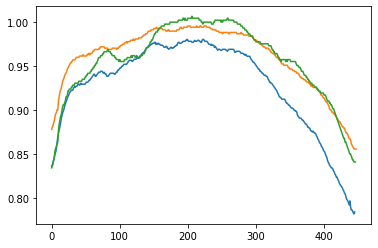

In [28]:
plt.plot(avdosea[110,3:-3]/avdosecentro.mean())
plt.plot(mvdosea[110,3:-3]/mvdosecentro.mean())
plt.plot(bvdosea[110,3:-3]/bvdosecentro.mean())

Promediar la distribuciones de dosis relativas

In [29]:
avdosea.shape, mvdosea.shape, bvdosea.shape

((219, 452), (220, 454), (220, 453))

In [30]:
rdose = (avdosea[3:216, 3:450]/avdosecentro.mean() + mvdosea[3:216, 3:450]/mvdosecentro.mean() + bvdosea[3:216, 3:450]/bvdosecentro.mean())/3

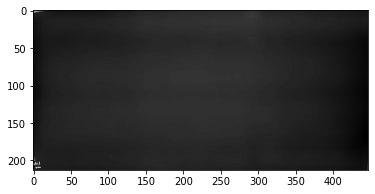

In [31]:
plt.imshow(rdose, cmap=plt.cm.gray)

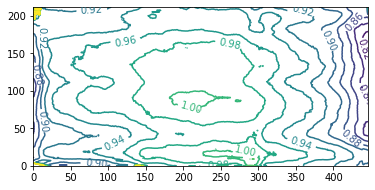

In [32]:
fig, ax = plt.subplots()
CS = ax.contour(rdose, levels=np.linspace(0.8, 1.1, num=16))
ax.clabel(CS, inline=True, fontsize=10, fmt='%.2f')
plt.gca().set_aspect("equal")
plt.show()

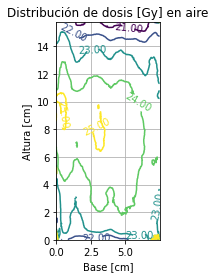

In [33]:
y = np.arange(0,213*.3528,.3528)/10
x = np.arange(0,446*.3528,.3528)/10
X, Y = np.meshgrid(y, x)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, 25*rdose.transpose(), levels=[21,22,23,24,25])
ax.clabel(CS, inline=True, fontsize=10, fmt='%.2f')
ax.set_xlabel('Base [cm]')
ax.set_ylabel('Altura [cm]')
ax.set_title('Distribución de dosis [Gy] en aire')

plt.gca().set_aspect("equal")
plt.grid(visible=True)
plt.show()
# fig.savefig('CurvasIsodosis.pdf', dpi=300)

## Películas de calibración en orientación apaisada

Repetir el análisis con la tira de calibración con la misma orientación que la película de medida

In [35]:
laddf = pd.read_csv('Dosis/IVerticalLandscape.dxf', delimiter='\t', header=47, names=np.arange(449))
lmddf = pd.read_csv('Dosis/IIVerticalLandscape.dxf', delimiter='\t', header=47, names=np.arange(449))
lbddf = pd.read_csv('Dosis/IIIVerticalLandscape.dxf', delimiter='\t', header=47, names=np.arange(449))

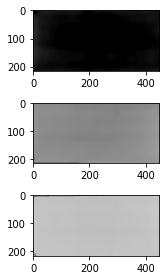

In [44]:
fig, (axa, axm, axb) = plt.subplots(ncols=1, nrows=3)
axa.imshow(laddf.values, cmap=plt.cm.gray_r)
axm.imshow(lmddf.values, cmap=plt.cm.gray_r)
axb.imshow(lbddf.values, cmap=plt.cm.gray_r)
plt.tight_layout()
plt.show()

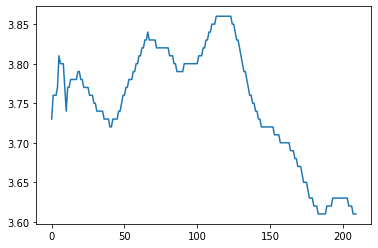

In [49]:
plt.plot(lbddf.values[3:-3, 200])